In [1]:
import pickle
from drawing.bandit_drawer import draw, draw_sampling_complexity_comparison, draw_theoretical_complexity

from same_mean_experiment import get_same_mean_experiment, execute

using 16 processes


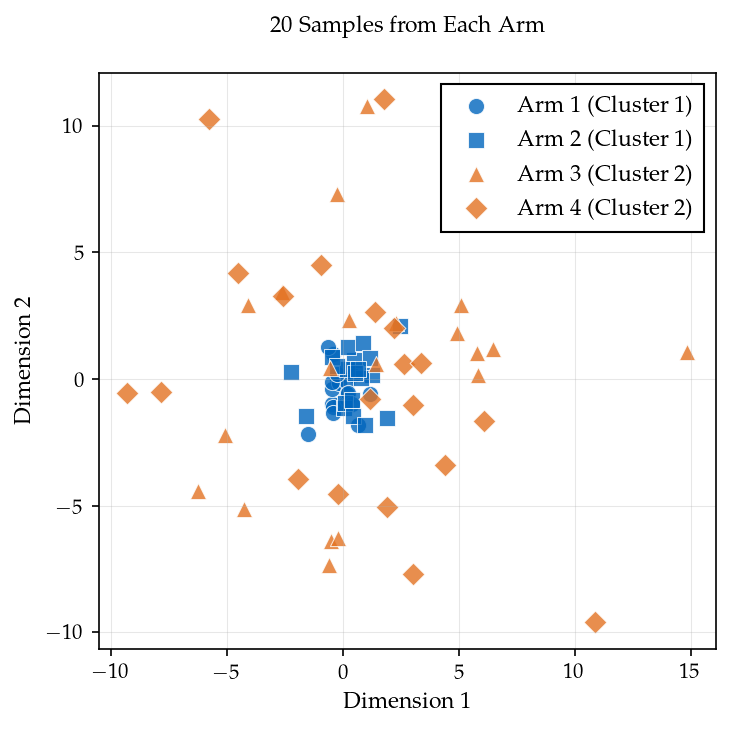

In [2]:
arms, K = get_same_mean_experiment(20)
draw(arms, 'data/same_mean_experiment_data.pdf')

In [3]:
with open('data/same_mean_experiment_VKABC.p', 'rb') as fp:
    sampling_complexities_VKABC = pickle.load(fp)
with open('data/same_mean_experiment_KABC.p', 'rb') as fp:
    sampling_complexities_KABC = pickle.load(fp)
with open('data/same_mean_experiment_taus.p', 'rb') as fp:
    taus = pickle.load(fp)

In [4]:
sampling_complexities_KABC

{200: 161076, 400: 38316, 800: 8904, 1600: 4216, 3200: 1952, 6400: 1952}

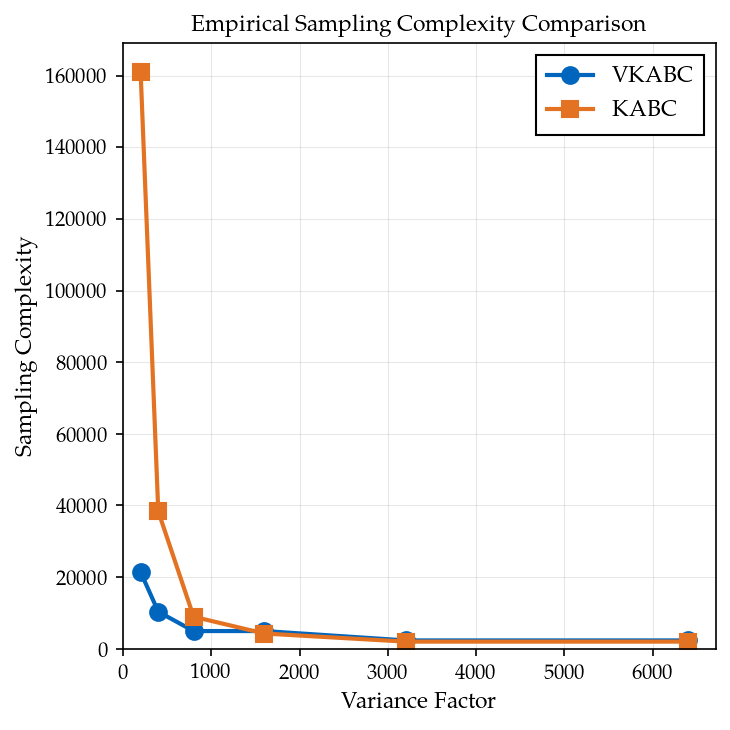

In [5]:
# Extract distances and sampling complexities
distances = list(sampling_complexities_VKABC.keys())
complexities_vkabc_empirical = list(sampling_complexities_VKABC.values())
complexities_kabc = list(sampling_complexities_KABC.values())

# Create the styled plot comparing VKABC (Empirical) vs KABC
draw_sampling_complexity_comparison(distances, complexities_vkabc_empirical, complexities_kabc, 'data/sampling_complexity_comparison.pdf')

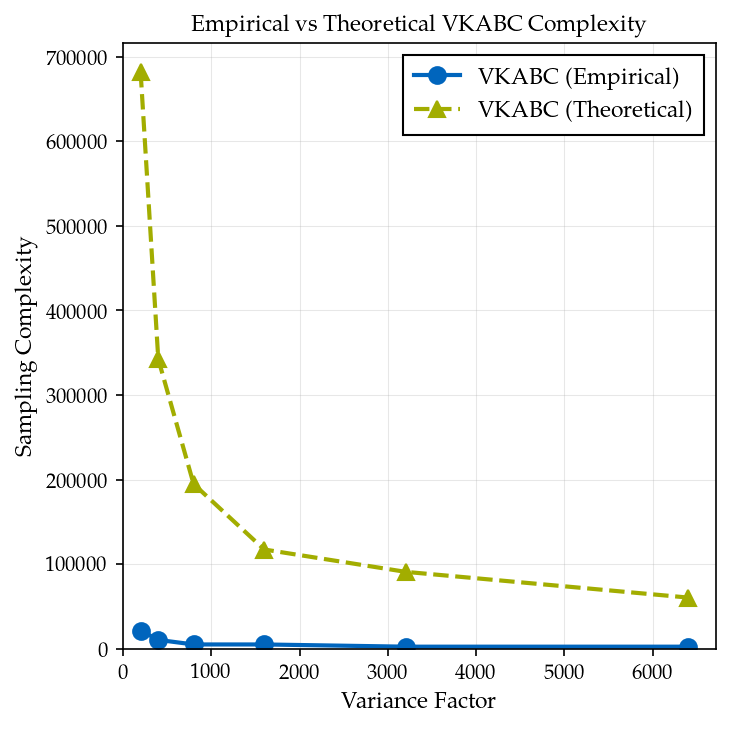

In [6]:
# Extract distances and complexities for empirical vs theoretical comparison
distances = list(taus.keys())
complexities_vkabc_empirical = [sampling_complexities_VKABC[d] for d in distances]
tau_list = list(taus.values())

# Create the styled plot comparing VKABC (Empirical) vs VKABC (Theoretical)
draw_theoretical_complexity(distances, complexities_vkabc_empirical, tau_list, 'data/empirical_vs_theoretical.pdf')

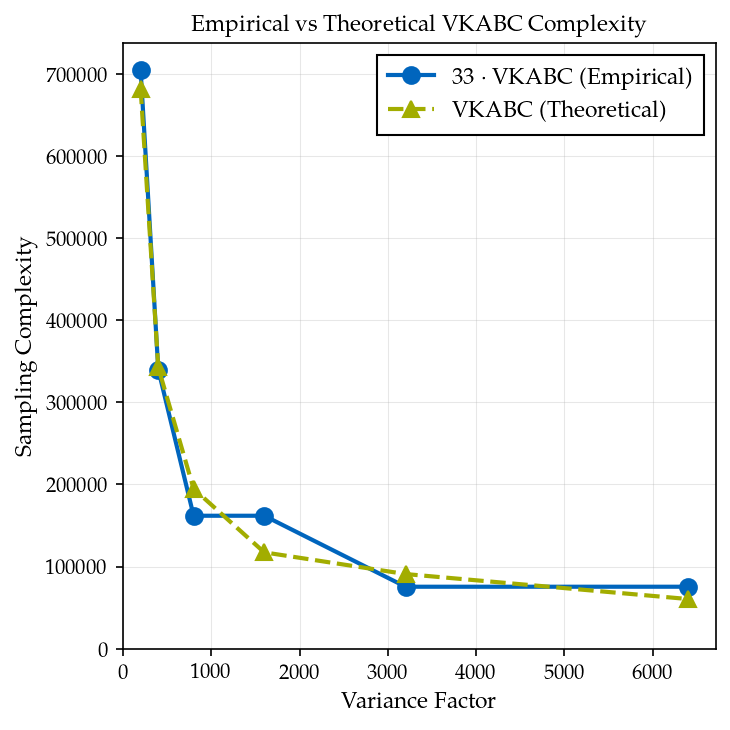

In [7]:
draw_theoretical_complexity(distances, complexities_vkabc_empirical, tau_list, 'data/empirical_vs_theoretical_factor.pdf', factor=33)